In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nfstream import NFStreamer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import plotly.express as px


In [2]:
# Caminho para a pasta que contém os arquivos PCAP
pcap_folder = "/home/giselle/Documentos/UFF/PESQUISA/DATASET/Network-Traffic-Dataset/app"

# Lista para armazenar os DataFrames
dfs = []

# Iterar sobre cada arquivo na pasta
for filename in os.listdir(pcap_folder):
    if filename.endswith(".pcap"):
        # Caminho completo para o arquivo
        file_path = os.path.join(pcap_folder, filename)

        # Criar um NFStreamer para ler o arquivo PCAP
        streamer = NFStreamer(source=file_path,n_dissections=0, statistical_analysis=True)

        # Converter o streamer em DataFrame
        df = streamer.to_pandas()

        # Adicionar uma coluna com o nome do arquivo
        #df['aplicacao'] = filename
        df['aplicacao'] = filename
        df['aplicacao'] = df['aplicacao'].apply(lambda x: x.split('_')[0])
        # Adicionar o DataFrame à lista
        dfs.append(df)

# Concatenar todos os DataFrames em um único DataFrame
df_final = pd.concat(dfs, ignore_index=True)

In [3]:
# Mostrar o DataFrame final
df_final.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,aplicacao
0,0,0,35.188.42.15,00:00:00:00:00:00,00:00:00,443,192.168.31.88,00:00:00:00:00:00,00:00:00,27194,...,1,0,0,0,0,0,0,0,0,Deezer
1,1,0,185.86.138.122,00:00:00:00:00:00,00:00:00,443,192.168.31.88,00:00:00:00:00:00,00:00:00,27200,...,1,0,0,0,0,0,0,0,0,Deezer
2,2,0,2.19.196.131,00:00:00:00:00:00,00:00:00,443,192.168.31.88,00:00:00:00:00:00,00:00:00,27193,...,1,0,0,0,0,0,0,0,0,Deezer
3,3,0,185.60.218.35,00:00:00:00:00:00,00:00:00,443,192.168.31.88,00:00:00:00:00:00,00:00:00,27195,...,1,0,0,0,0,0,0,0,0,Deezer
4,4,0,185.60.218.35,00:00:00:00:00:00,00:00:00,443,192.168.31.88,00:00:00:00:00:00,00:00:00,27260,...,1,0,0,0,0,0,0,0,0,Deezer


In [4]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11603 entries, 0 to 11602
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            11603 non-null  int64  
 1   expiration_id                 11603 non-null  int64  
 2   src_ip                        11603 non-null  object 
 3   src_mac                       11603 non-null  object 
 4   src_oui                       11603 non-null  object 
 5   src_port                      11603 non-null  int64  
 6   dst_ip                        11603 non-null  object 
 7   dst_mac                       11603 non-null  object 
 8   dst_oui                       11603 non-null  object 
 9   dst_port                      11603 non-null  int64  
 10  protocol                      11603 non-null  int64  
 11  ip_version                    11603 non-null  int64  
 12  vlan_id                       11603 non-null  int64  
 13  t

In [5]:
df_final['aplicacao'].unique()

array(['Deezer', 'Zoom', 'Facebook', 'Skype', 'Microsoft-Teams',
       'WhatsApp', 'Amazon-Prime-Video', 'Spotify', 'Epic-Games',
       'Telegram'], dtype=object)

In [6]:
df_final.drop(['id', 'expiration_id', 'src_ip', 'src_mac', 'src_oui', 'src_port',
       'dst_ip', 'dst_mac', 'dst_oui', 'dst_port', 'protocol', 'ip_version',
       'vlan_id', 'tunnel_id'], axis=1, inplace=True)


In [7]:
df_final.columns

Index(['bidirectional_first_seen_ms', 'bidirectional_last_seen_ms',
       'bidirectional_duration_ms', 'bidirectional_packets',
       'bidirectional_bytes', 'src2dst_first_seen_ms', 'src2dst_last_seen_ms',
       'src2dst_duration_ms', 'src2dst_packets', 'src2dst_bytes',
       'dst2src_first_seen_ms', 'dst2src_last_seen_ms', 'dst2src_duration_ms',
       'dst2src_packets', 'dst2src_bytes', 'bidirectional_min_ps',
       'bidirectional_mean_ps', 'bidirectional_stddev_ps',
       'bidirectional_max_ps', 'src2dst_min_ps', 'src2dst_mean_ps',
       'src2dst_stddev_ps', 'src2dst_max_ps', 'dst2src_min_ps',
       'dst2src_mean_ps', 'dst2src_stddev_ps', 'dst2src_max_ps',
       'bidirectional_min_piat_ms', 'bidirectional_mean_piat_ms',
       'bidirectional_stddev_piat_ms', 'bidirectional_max_piat_ms',
       'src2dst_min_piat_ms', 'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms',
       'src2dst_max_piat_ms', 'dst2src_min_piat_ms', 'dst2src_mean_piat_ms',
       'dst2src_stddev_piat_ms', 

In [8]:
df_final.shape

(11603, 64)

In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11603 entries, 0 to 11602
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bidirectional_first_seen_ms   11603 non-null  int64  
 1   bidirectional_last_seen_ms    11603 non-null  int64  
 2   bidirectional_duration_ms     11603 non-null  int64  
 3   bidirectional_packets         11603 non-null  int64  
 4   bidirectional_bytes           11603 non-null  int64  
 5   src2dst_first_seen_ms         11603 non-null  int64  
 6   src2dst_last_seen_ms          11603 non-null  int64  
 7   src2dst_duration_ms           11603 non-null  int64  
 8   src2dst_packets               11603 non-null  int64  
 9   src2dst_bytes                 11603 non-null  int64  
 10  dst2src_first_seen_ms         11603 non-null  int64  
 11  dst2src_last_seen_ms          11603 non-null  int64  
 12  dst2src_duration_ms           11603 non-null  int64  
 13  d

In [10]:
# Seed para reproduzibilidade dos resultados
SEED = 37

# embaralhando os dados para garantir que o modelo não esta se baseando na ordem dos dados para realizar a classificação
df_final = shuffle(df_final, random_state=SEED)  
df_final = df_final.reset_index(drop=True)

#a coluna aplicação corresponde a identificação das aplicações.
x = df_final.drop('aplicacao', axis=1)
y = df_final['aplicacao']

# dividir os dados em treino e teste 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=SEED)


In [11]:
df_final.head(20)

,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,aplicacao
0,4005,4145,140,8,5107,4005,4145,140,8,5107,...,1,0,0,0,0,0,0,0,0,Deezer
1,1639314024390,1639314148750,124360,31,10291,1639314024390,1639314115240,90850,13,2867,...,0,1,0,0,0,18,7,1,0,Skype
2,1863,1863,0,18,2042,1863,1863,0,18,2042,...,1,0,0,0,0,0,0,0,0,WhatsApp
3,6234,6594,360,20,19623,6234,6594,360,20,19623,...,1,0,0,0,0,0,0,0,0,Epic-Games
4,21531,21531,0,464,413237,21531,21531,0,464,413237,...,0,0,0,0,0,0,0,0,0,Microsoft-Teams
5,5150,5350,200,10,7120,5150,5350,200,10,7120,...,1,0,0,0,0,0,0,0,0,Microsoft-Teams
6,524,524,0,18,4916,524,524,0,18,4916,...,1,0,0,0,0,0,0,0,0,WhatsApp
7,31951,31951,0,49,52813,31951,31951,0,49,52813,...,1,0,0,0,0,0,0,0,0,Deezer
8,244737,244737,0,18,5920,244737,244737,0,18,5920,...,0,0,0,0,0,0,0,0,0,Amazon-Prime-Video
9,24,9675,9651,203,25131,24,9675,9651,203,25131,...,1,0,0,0,0,0,0,0,0,Spotify


In [12]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [14]:
correlacao = pd.concat([x_treino, y_treino], axis=1).corr()

In [16]:
# Criação do modelo de árvore de decisão 
modelo_tree = DecisionTreeClassifier(max_depth=8, random_state=SEED)

#executando treino
modelo_tree = modelo_tree.fit(x_treino, y_treino)

# Avaliação da acurácia do modelo com o conjunto de teste
acuracia_modelo_tree = modelo_tree.score(x_teste, y_teste)
print("A acurácia do classificador Decision Tree é igual a:", acuracia_modelo_tree)

A acurácia do classificador Decision Tree é igual a: 0.9554725653547831


In [17]:
#verificando a importancia das features para o decision tree
importancia_modelo_tree = pd.DataFrame({'colunas':x_treino.columns,'importancia':modelo_tree.feature_importances_})

In [18]:
#avaliando a importancia das features em ordem decrescente para o decision tree
importancia_modelo_tree_todas = importancia_modelo_tree.sort_values(by="importancia", ascending=False)


In [19]:
importancia_modelo_tree_todas.head(28)

,colunas,importancia
1,bidirectional_last_seen_ms,0.465530
6,src2dst_last_seen_ms,0.126020
22,src2dst_max_ps,0.105192
18,bidirectional_max_ps,0.093968
5,src2dst_first_seen_ms,0.058481
44,bidirectional_psh_packets,0.036696
52,src2dst_psh_packets,0.017074
21,src2dst_stddev_ps,0.015138
2,bidirectional_duration_ms,0.011545
43,bidirectional_ack_packets,0.010876


In [103]:
importancia_modelo_tree_20 = importancia_modelo_tree_todas.head(20)


[Text(0, 0, 'bidirectional_last_seen_ms'),
 Text(1, 0, 'src2dst_last_seen_ms'),
 Text(2, 0, 'src2dst_max_ps'),
 Text(3, 0, 'bidirectional_max_ps'),
 Text(4, 0, 'src2dst_first_seen_ms'),
 Text(5, 0, 'bidirectional_psh_packets'),
 Text(6, 0, 'src2dst_psh_packets'),
 Text(7, 0, 'src2dst_stddev_ps'),
 Text(8, 0, 'bidirectional_duration_ms'),
 Text(9, 0, 'bidirectional_ack_packets'),
 Text(10, 0, 'bidirectional_mean_ps'),
 Text(11, 0, 'bidirectional_stddev_piat_ms'),
 Text(12, 0, 'bidirectional_first_seen_ms'),
 Text(13, 0, 'src2dst_fin_packets'),
 Text(14, 0, 'src2dst_mean_ps'),
 Text(15, 0, 'bidirectional_stddev_ps'),
 Text(16, 0, 'src2dst_bytes'),
 Text(17, 0, 'src2dst_stddev_piat_ms'),
 Text(18, 0, 'src2dst_mean_piat_ms'),
 Text(19, 0, 'bidirectional_fin_packets')]

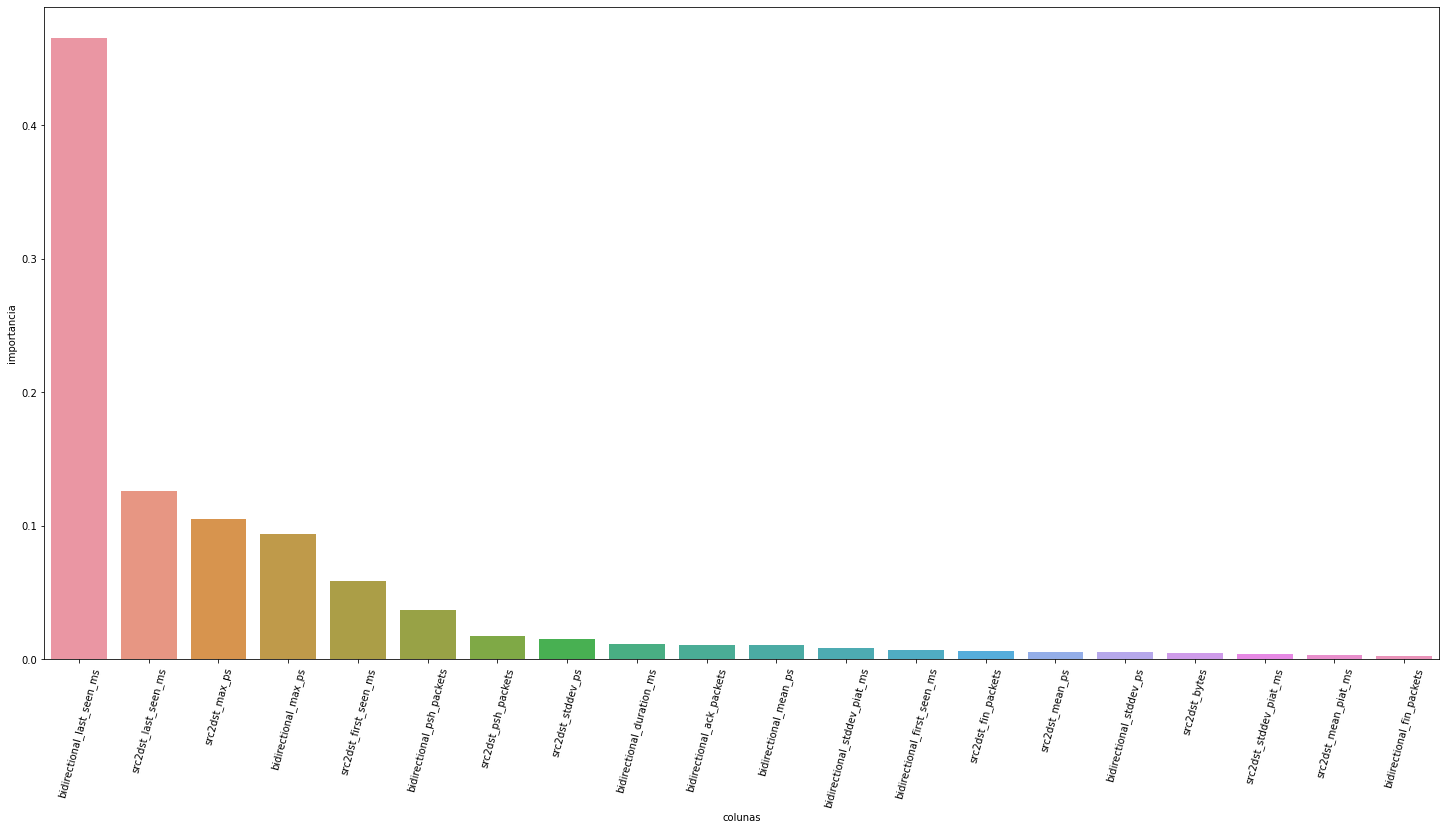

In [104]:
plt.figure(figsize=(25,12))
ax = sns.barplot(x='colunas',y='importancia',data=importancia_modelo_tree_20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)



In [24]:
# Criação do modelo RandomForest
modelo_random = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=SEED)

#executando treino
modelo_random = modelo_random.fit(x_treino, y_treino)

# Avaliação da acurácia do modelo com o conjunto de teste
acuracia_modelo_random = modelo_random.score(x_teste, y_teste)
print(" A acurácia do classificador Random Forest é igual a:", acuracia_modelo_random)

 A acurácia do classificador Random Forest é igual a: 0.97701809824763


In [25]:
#verificando a importancia das features
importancia_modelo_random = pd.DataFrame({'colunas':x_treino.columns,'importancia':modelo_random.feature_importances_})

In [26]:
#avaliando a importancia das features em ordem decrescente
importancia_modelo_random_todas = importancia_modelo_random.sort_values(by="importancia", ascending=False)


In [27]:
importancia_modelo_random_todas.shape

(63, 2)

In [28]:
importancia_modelo_random_todas.tail(13)

,colunas,importancia
55,dst2src_syn_packets,0.000012
62,dst2src_fin_packets,0.000010
35,dst2src_min_piat_ms,0.000000
50,src2dst_urg_packets,0.000000
41,bidirectional_ece_packets,0.000000
49,src2dst_ece_packets,0.000000
56,dst2src_cwr_packets,0.000000
57,dst2src_ece_packets,0.000000
58,dst2src_urg_packets,0.000000
48,src2dst_cwr_packets,0.000000


In [29]:
importancia_modelo_random_51 = importancia_modelo_random_todas.head(51)


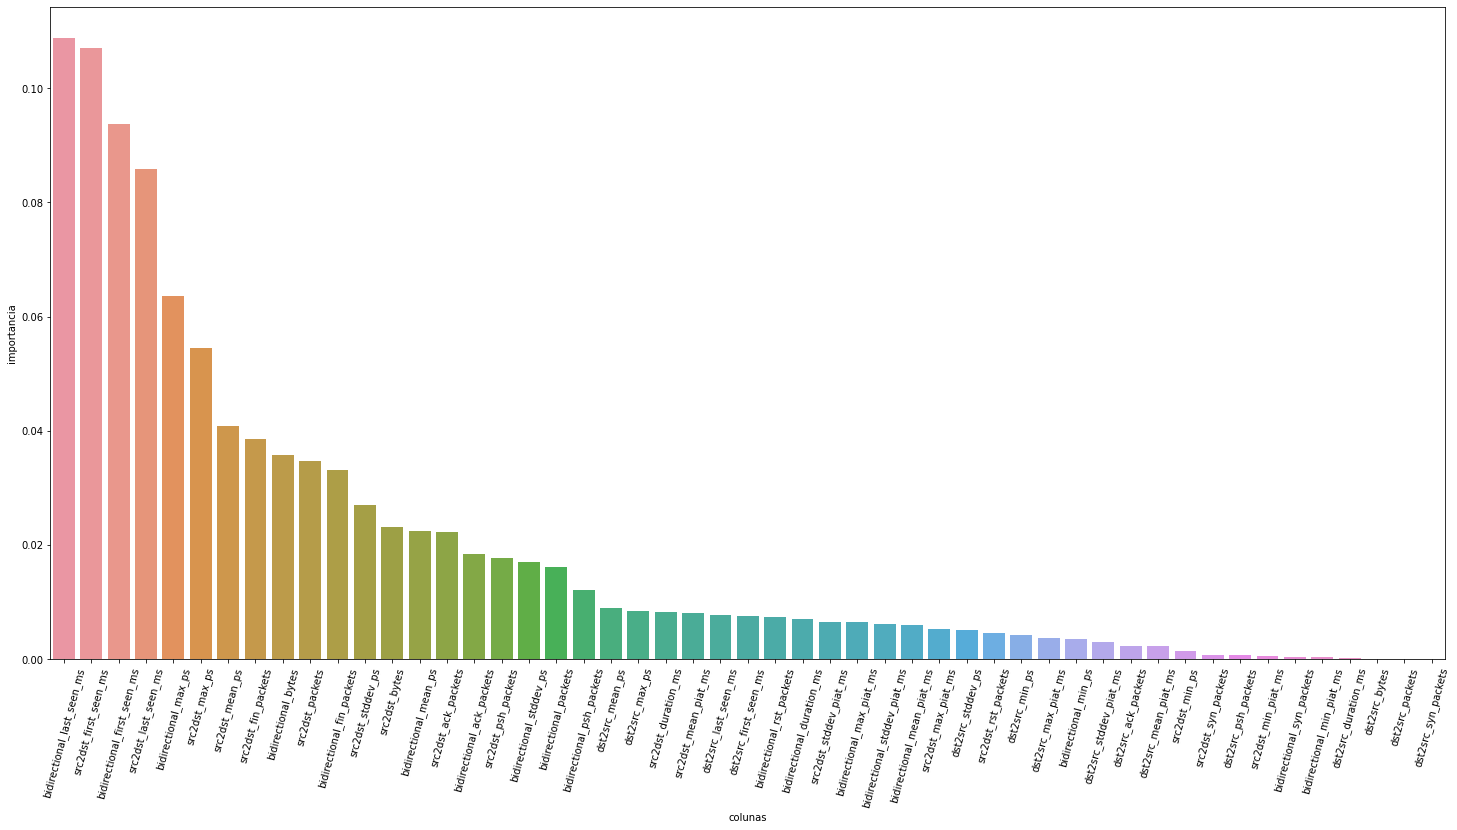

In [30]:
plt.figure(figsize=(25,12))
ax = sns.barplot(x='colunas',y='importancia',data=importancia_modelo_random_51)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

In [31]:
# Previsões do modelo
y_pred = modelo_random.predict(x_teste)

# Criando um DataFrame com os valores reais e os valores preditos
resultado_df = pd.DataFrame({'Valor Real': y_teste, 'Valor Classificado': y_pred})

# Exibindo as primeiras linhas da tabela para verificação
resultado_df.head(20)


,Valor Real,Valor Classificado
154,Spotify,Spotify
2589,Telegram,Telegram
3409,Facebook,Facebook
9164,Microsoft-Teams,Microsoft-Teams
3290,Spotify,Spotify
3024,Amazon-Prime-Video,Amazon-Prime-Video
3323,Spotify,Spotify
1152,Deezer,Deezer
4072,WhatsApp,WhatsApp
6170,Epic-Games,Epic-Games


In [32]:
x_teste['aplicações_classificadas'] = y_pred
x_teste.head()

,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,aplicações_classificadas
154,24,9740,9716,17,7130,24,9740,9716,17,7130,...,1,0,0,0,0,0,0,0,0,Spotify
2589,9222,9222,0,86,78495,9222,9222,0,86,78495,...,1,0,0,0,0,0,0,0,0,Telegram
3409,1639744822733,1639744829206,6473,38,5454,1639744822733,1639744829206,6473,16,3342,...,1,1,0,0,0,22,9,0,1,Facebook
9164,41152,41152,0,12,6703,41152,41152,0,12,6703,...,0,0,0,0,0,0,0,0,0,Microsoft-Teams
3290,9131,9131,0,8,5966,9131,9131,0,8,5966,...,1,0,0,0,0,0,0,0,0,Spotify


In [33]:
#x_teste['bidirectional_bytes (MB)'] = x_teste['bidirectional_bytes'] / (2**20)
resultado2 = pd.DataFrame(x_teste, columns=['aplicações_classificadas','bidirectional_bytes'])





In [34]:
df_2 = resultado2.groupby(resultado2['aplicações_classificadas']).sum()
df_2.head(10)

,bidirectional_bytes
aplicações_classificadas,
Amazon-Prime-Video,361196928
Deezer,7158244
Epic-Games,454471673
Facebook,33300354
Microsoft-Teams,63246427
Skype,6146430
Spotify,7699229
Telegram,15760495
WhatsApp,3575145


In [55]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [85]:
# Calculando a média de cada feature por aplicação
media_features = x_teste.groupby('aplicações_classificadas').mean()

# Resetar o índice para facilitar a plotagem
media_features = media_features.reset_index()
media_features.head(20)

,aplicações_classificadas,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,...,src2dst_rst_packets,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets
0,Amazon-Prime-Video,234275.9475,238373.2022,4097.2548,410.1306,575154.3439,234275.9475,238373.2022,4097.2548,410.1258,...,0.0000,0.0303,0.0000,0.0000,0.0000,0.0000,0.0048,0.0000,0.0000,0.0000
1,Deezer,20277.5430,20828.5508,551.0078,24.8203,13980.9453,20277.5430,20828.5508,551.0078,24.8203,...,0.0020,1.0195,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,Epic-Games,22346.4692,27179.7969,4833.3276,461.0959,650174.0672,22346.4692,27179.7969,4833.3276,461.0944,...,0.0172,0.4578,0.0000,0.0000,0.0000,0.0000,0.0014,0.0000,0.0000,0.0000
3,Facebook,1639726250821.7102,1639726261017.7463,10196.0362,269.3478,241306.9130,1639726250821.7102,1639726260583.5144,9761.8043,73.3913,...,0.0145,0.7826,0.8768,0.0000,0.0000,0.0000,93.1667,84.8261,0.0072,0.7754
4,Microsoft-Teams,47816.8565,59171.2278,11354.3713,292.0675,266862.5612,47816.8565,59171.2278,11354.3713,292.0549,...,0.2574,0.4135,0.0000,0.0000,0.0000,0.0000,0.0042,0.0000,0.0000,0.0000
5,Skype,1639316451532.0000,1639316540191.6538,88659.6538,431.9423,118200.5769,1639316451532.0000,1639316533758.5386,82226.5385,212.5385,...,0.2308,0.2115,0.2885,0.0000,0.0000,0.0000,65.4038,21.5962,0.1154,0.1538
6,Spotify,8011.1314,8283.7513,272.6199,31.1776,13675.3623,8011.1314,8283.7513,272.6199,31.1776,...,0.0089,0.9947,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,Telegram,8573.2286,8592.9952,19.7667,79.6095,75049.9762,8573.2286,8592.9952,19.7667,79.6048,...,0.0095,0.9810,0.0000,0.0000,0.0000,0.0000,0.0048,0.0000,0.0000,0.0000
8,WhatsApp,2150.8680,2169.4315,18.5635,35.0203,18147.9442,2150.8680,2169.4315,18.5635,35.0203,...,0.0000,0.9949,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,Zoom,15533.5878,15587.0939,53.5061,52.2490,13568.0571,15533.5878,15587.0939,53.5061,52.2490,...,0.3306,0.7224,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [79]:
# Iterar sobre cada feature para criar um gráfico de barras
# Plotando gráficos de barras para cada feature
for column in media_features.columns[1:]:  # Ignora a coluna 'aplicacao'
    fig = px.histogram(media_features, x='aplicações_classificadas', y=column)
    fig.show()


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
cm = confusion_matrix(y_teste, y_pred)

In [134]:
class_labels = ['Amazon-Prime-Video', 'Deezer', 'Epic-Games', 'Facebook', 'Microsoft-Teams', 'Skype', 'Spotify', 'Telegram', 'WhatsApp', 'Zoom' ]  
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)


In [136]:
import plotly.express as px

# Visualizando a matriz de confusão com Plotly
fig = px.imshow(cm_df,
                labels=dict(x="Predições", y="Verdadeiros", color="Contagem"),
                x=class_labels,
                y=class_labels,
                text_auto=True,
                color_continuous_scale='Blues')

fig.update_layout(
    title="Matriz de Confusão",
    xaxis_title="Aplicação Classificada",
    yaxis_title="Aplicação Verdadeira"
)

fig.show()
